<a href="https://colab.research.google.com/github/ghassenov/ML_use_cases/blob/main/iris_dataset_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
from distutils.version import LooseVersion

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,[2,3]]
y = iris.target
print('class labels',np.unique(y))

class labels [0 1 2]


* 0 -> setosa
* 1 -> versicolor
* 2 -> virginica

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify = y)

In [5]:
print('Labels counts in y:',np.bincount(y))

Labels counts in y: [50 50 50]


In [6]:
print('labels counts in y_train:',np.bincount(y_train))

labels counts in y_train: [35 35 35]


In [7]:
print('labels counts in y_test:',np.bincount(y_test))

labels counts in y_test: [15 15 15]


Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Note that we used the same scaling parameters to standarize the test dataset so that both the values in the training and test dataset are comparable to each other

Now we can train a perceptron model. Most algos in scikit learn already support multiclass classification by default via the OvR method, which allows us to feed the three flowers at once to the perceptron all at once.

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.01,random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.01, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: ', (y_test != y_pred).sum())

Misclassified examples:  2


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))

Accuracy: 0.956


Alternatively each classifier in scikit learn has a score method, which computes a classifier's prediction accuracy by combining the predict call with accuracy_score

In [12]:
print('Accuracy: %.3f' % ppn.score(X_test_std,y_test))

Accuracy: 0.956


Now we can use plot_decision_function, to plot the decision regions of our newly trained perceptron model and visualize how well it seperates the different flower examples.

In [13]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]


        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100,
                        label='test set')

/tmp/ipython-input-13-778869266.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
/tmp/ipython-input-13-778869266.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


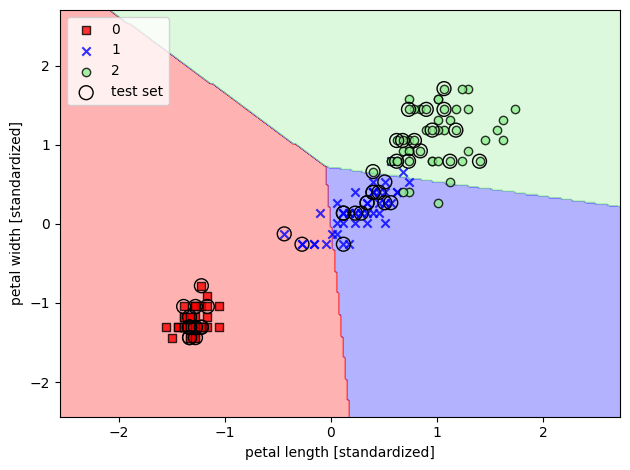

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

As we can see in the resulting plot, the three flower classes cannot be perfectly separated by a linear decision boundary

Modeling class probabilities via logistic regression
* logistic regression can be readily generalized to multiclass settings, which is known as multinomial logistic regression or softmax regression.

let's plot the sigmoid function for some values in the range -7 to 7 to see how it looks

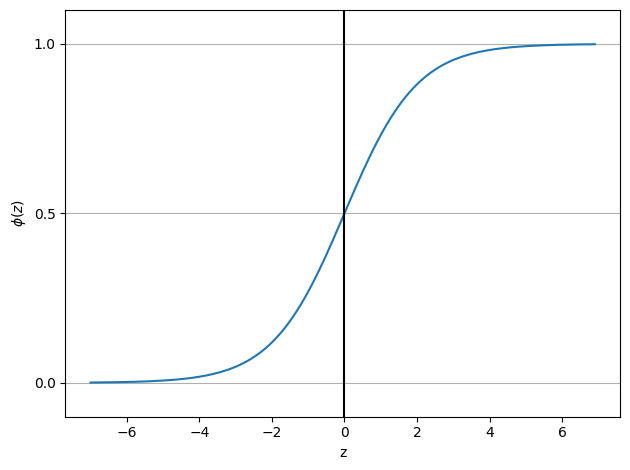

In [15]:
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()
